### Kushal Ghimire
### C0903150

In [35]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Development and Analysis
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [36]:
# Load dataset
df = pd.read_csv(r"C:\Users\Kush\Downloads\Algerian_forest_fires_cleaned.csv")

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [39]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## 1. Data Cleaning and Preprocessing

In [41]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

Duplicates: 0
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


#### clearly , we can see that there are no any duplicates and missing values

In [43]:
# Drop irrelevant columns
df.drop(columns=['day', 'month', 'year'], inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [45]:
# Encoding of categories in Classes into 0(Not Fire) and 1(Fire)

df['Classes'] =np.where(df['Classes'].str.contains('not fire'),0,1)

## 2. Data Visualization and Observations

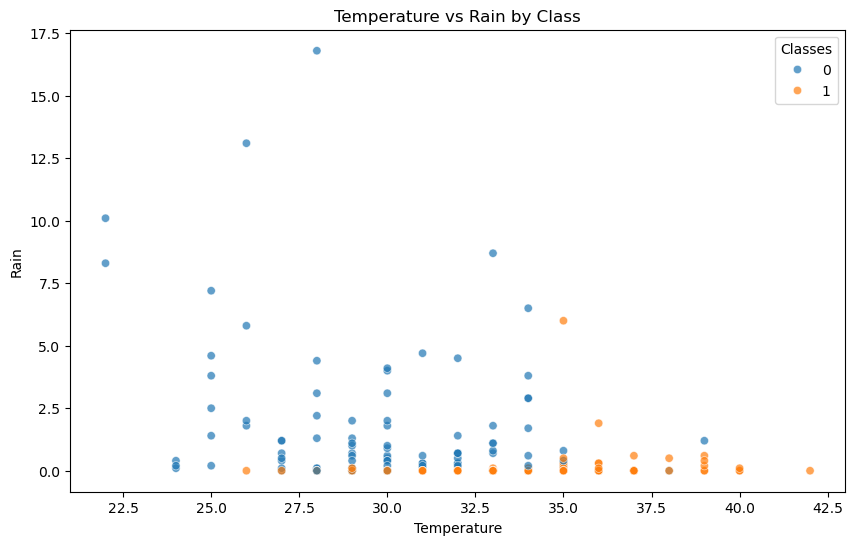

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Rain', hue='Classes', alpha=0.7)
plt.title('Temperature vs Rain by Class')
plt.xlabel('Temperature')
plt.ylabel('Rain')
plt.legend(title='Classes')
plt.show()

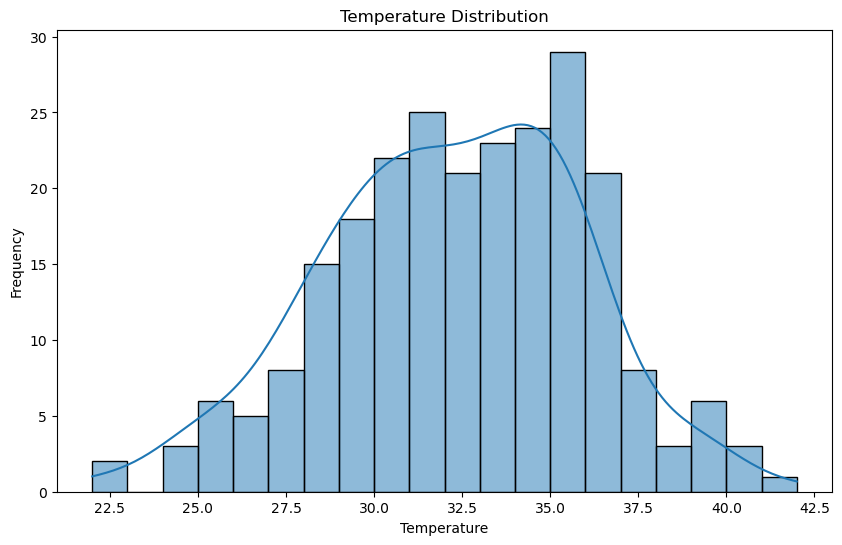

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

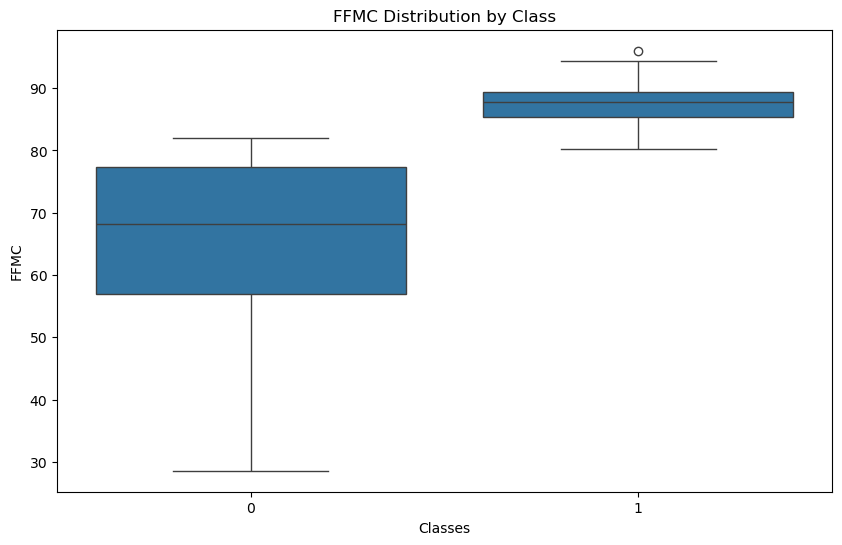

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classes', y='FFMC', data=df)
plt.title('FFMC Distribution by Class')
plt.show()

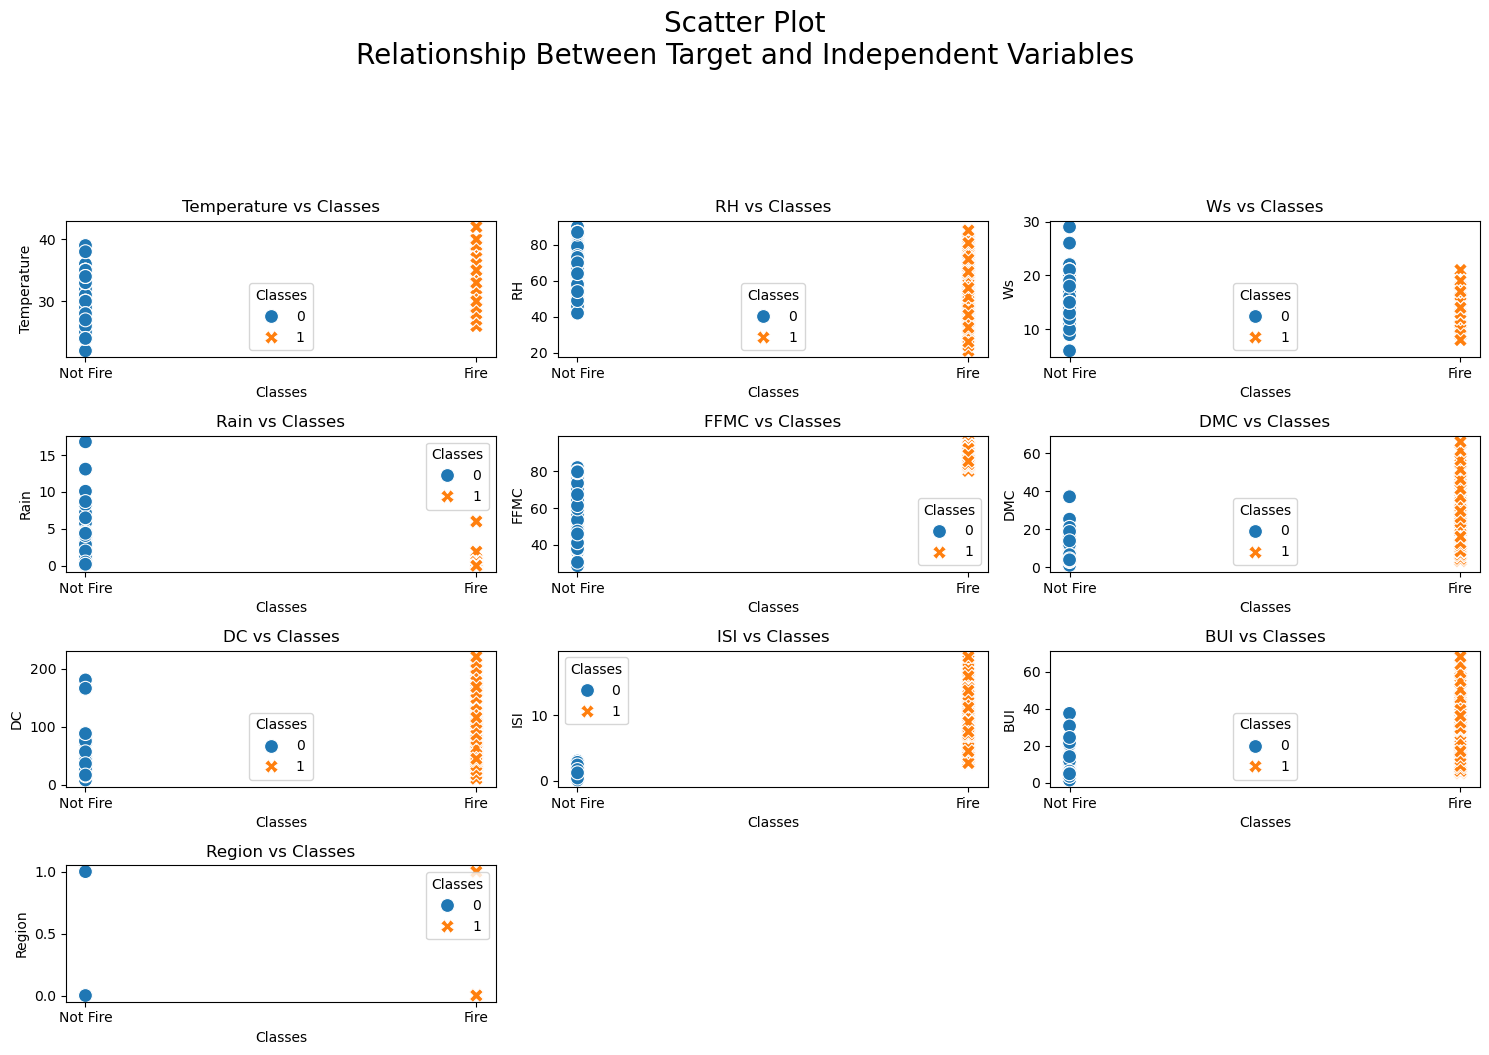

In [50]:
# Set the figure size and main title
plt.figure(figsize=(15, 10))
plt.suptitle('Scatter Plot\nRelationship Between Target and Independent Variables', fontsize=20, alpha=1, y=1.05)

# Exclude the 'FWI' and 'Classes' columns from the features
features = df.columns.drop(['FWI', 'Classes'])

# Loop through the features and create scatter plots
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    # Use a scatter plot with hue set to 'Classes'
    sns.scatterplot(x='Classes', y=feature, data=df, palette=['#1f77b4', '#ff7f0e'], 
                    hue='Classes', style='Classes', s=100)  # s controls the size of the points
    plt.xticks([0, 1], ['Not Fire', 'Fire'])  # Set the x-axis labels
    plt.title(f'{feature} vs Classes', fontsize=12)  # Set individual plot titles

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

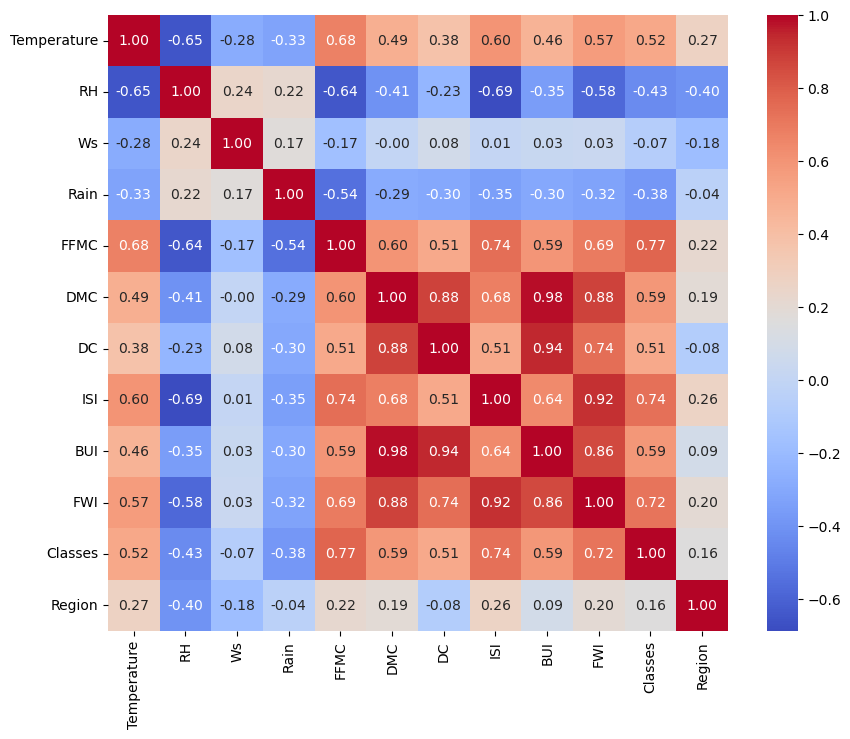

In [51]:
# Plot relation between target and independent variable (Heat Map)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## 3. Model Development and Analysis

In [53]:
#X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
#Y = df['FWI']  # Assuming FWI is the target variable

X = df.drop(['FWI'], axis=1)
Y = df['FWI']

In [54]:
# Convert categorical variable to numerical
X = pd.get_dummies(X, drop_first=True)

In [55]:
#  Split the Dataset
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Implementation of multiple linear regression with cross validation

In [58]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = linear_model.predict(x_train_scaled)
y_test_pred = linear_model.predict(x_test_scaled)

# Cross-Validation
cv_scores = cross_val_score(linear_model, x_train_scaled, y_train, cv=5)
print("Linear Regression - CV Mean Score:", np.mean(cv_scores))

# Print outputs
print("Linear Regression - Train MSE:", mean_squared_error(y_train, y_train_pred), 
      "Train R²:", r2_score(y_train, y_train_pred),
      "Train MAE:", mean_absolute_error(y_train, y_train_pred))  # MAE for training set

print("Linear Regression - Test MSE:", mean_squared_error(y_test, y_test_pred), 
      "Test R²:", r2_score(y_test, y_test_pred),
      "Test MAE:", mean_absolute_error(y_test, y_test_pred))  # MAE for test set

Linear Regression - CV Mean Score: 0.9550642876871317
Linear Regression - Train MSE: 1.5922515862521087 Train R²: 0.9737558301667233 Train MAE: 0.6764092608548995
Linear Regression - Test MSE: 0.3323111538486409 Test R²: 0.9890356825759856 Test MAE: 0.42675206146898664


### Implementation of polynomial regression model with cross validation

In [60]:
# Polynomial Features
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train_scaled)
x_test_poly = poly_features.transform(x_test_scaled)

# Fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Predictions
y_train_poly_pred = poly_model.predict(x_train_poly)
y_test_poly_pred = poly_model.predict(x_test_poly)

# Cross-Validation
cv_poly_scores = cross_val_score(poly_model, x_train_poly, y_train, cv=5)
print("Polynomial Regression - CV Mean Score:", np.mean(cv_poly_scores))

# Print outputs
print("Polynomial Regression - Train MSE:", mean_squared_error(y_train, y_train_poly_pred), 
      "Train R²:", r2_score(y_train, y_train_poly_pred))
print("Polynomial Regression - Test MSE:", mean_squared_error(y_test, y_test_poly_pred), 
      "Test R²:", r2_score(y_test, y_test_poly_pred))

Polynomial Regression - CV Mean Score: 0.9853556715173747
Polynomial Regression - Train MSE: 0.019455808355299274 Train R²: 0.9996793210676448
Polynomial Regression - Test MSE: 0.24721219173889453 Test R²: 0.9918434487981522


### # Lasso Regression with Hyperparameter Tuning

In [62]:
# Lasso Regression with Hyperparameter Tuning
lasso_model = Lasso()
lasso_params = {'alpha': np.logspace(-4, 4, 10)}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
lasso_grid.fit(x_train_scaled, y_train)

# Best Alpha and Predictions
print("Best Lasso Alpha:", lasso_grid.best_params_['alpha'])
y_test_lasso_pred = lasso_grid.predict(x_test_scaled)

# Cross-Validation for Lasso
lasso_cv_scores = cross_val_score(lasso_grid.best_estimator_, x_train_scaled, y_train, cv=5)
print("Lasso Regression - CV Mean Score:", np.mean(lasso_cv_scores))

# Print outputs
print("Lasso Regression - Test MSE:", mean_squared_error(y_test, y_test_lasso_pred), 
      "Test R²:", r2_score(y_test, y_test_lasso_pred))

Best Lasso Alpha: 0.046415888336127774
Lasso Regression - CV Mean Score: 0.9563677218433565
Lasso Regression - Test MSE: 0.37899972317569985 Test R²: 0.9874952338482004


K:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
K:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
K:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.997e+01, tolerance: 9.824e-01
  model = cd_fast.enet_coo

### Ridge Regression with Hyperparameter Tuning

In [64]:
# Ridge Regression with Hyperparameter Tuning
ridge_model = Ridge()
ridge_params = {'alpha': np.logspace(-4, 4, 10)}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(x_train_scaled, y_train)

# Best Alpha and Predictions
print("Best Ridge Alpha:", ridge_grid.best_params_['alpha'])
y_test_ridge_pred = ridge_grid.predict(x_test_scaled)

# Cross-Validation for Ridge
ridge_cv_scores = cross_val_score(ridge_grid.best_estimator_, x_train_scaled, y_train, cv=5)
print("Ridge Regression - CV Mean Score:", np.mean(ridge_cv_scores))

# Print outputs
print("Ridge Regression - Test MSE:", mean_squared_error(y_test, y_test_ridge_pred), 
      "Test R²:", r2_score(y_test, y_test_ridge_pred))

Best Ridge Alpha: 2.782559402207126
Ridge Regression - CV Mean Score: 0.9571504045967764
Ridge Regression - Test MSE: 0.533764326885856 Test R²: 0.98238891038771


### Model Evaluation and testing

### Creating Pickle file and saving and then testing the model

In [67]:
import pickle

# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the Linear Regression model
linreg_filename = 'linear_model.pkl'
with open(linreg_filename, 'wb') as file:
    pickle.dump(linear_model, file)

# Save the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'wb') as file:
    pickle.dump(lasso_grid, file)

# Save the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'wb') as file:
    pickle.dump(ridge_grid, file)


In [68]:
# Load the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

# Load the Linear Regression model
linreg_filename = 'linear_model.pkl'
with open(linreg_filename, 'rb') as file:
    loaded_linear_model = pickle.load(file)

# Load the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'rb') as file:
    loaded_lasso_model = pickle.load(file)

# Load the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'rb') as file:
    loaded_ridge_model = pickle.load(file)

### Define new unseen data with all necessary features

In [71]:
# Define new unseen data with all necessary features
new_data = pd.DataFrame({
    'Temperature': [20],
    'RH': [45],
    'Ws': [20],
    'Rain': [0.9],
    'FFMC': [85],
    'DMC': [6],
    'DC': [8],
    'ISI': [5], 
    'BUI': [15],
    'Classes': [0],  
    'Region': [0]    
})

x_train.columns

# Scale the new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict with all models
linreg_pred = loaded_linear_model.predict(new_data_scaled)
lasso_pred = loaded_lasso_model.predict(new_data_scaled)
ridge_pred = loaded_ridge_model.predict(new_data_scaled)


# Predictions
print(f"Linear Regression Prediction for FWI: {linreg_pred[0]}")
print(f"Lasso Regression Prediction for FWI: {lasso_pred[0]}")
print(f"Ridge Regression Prediction for FWI: {ridge_pred[0]}")

Linear Regression Prediction for FWI: 6.278384883144598
Lasso Regression Prediction for FWI: 5.981117325167279
Ridge Regression Prediction for FWI: 5.404275877478746
